In [ ]:
from metakan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = MultKAN(width=[4,4,2,1], grid=5, k=3, seed=12, device=device, embedding_dim=1, hidden_dim=16)

cuda
checkpoint directory created: ./model
saving model version 0.0


In [89]:

dim=4
const_2 = 1
c = torch.randn(1, dim - 1)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: (1 - torch.sum(x**2, dim=1)) * torch.sum(c * torch.sin(x[:, :-1] + const_2 * torch.cos(x[:, 1:]) + x[:, 1:] * torch.cos(x[:, :-1])), dim=1)

dataset = create_dataset(f, n_var=4, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 4]), torch.Size([1000, 1]))

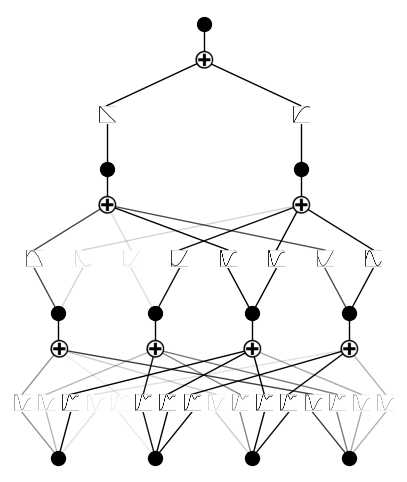

In [90]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot()

In [93]:
# train the model
model.fit(dataset, opt="LBFGS", steps=200, lr = 1, update_grid=False);


| train_loss: 1.44e-01 | test_loss: 1.86e-01 | reg: 0.00e+00 | :  52%|▌| 105/200 [00:24<00:22,  4.25


KeyboardInterrupt: 

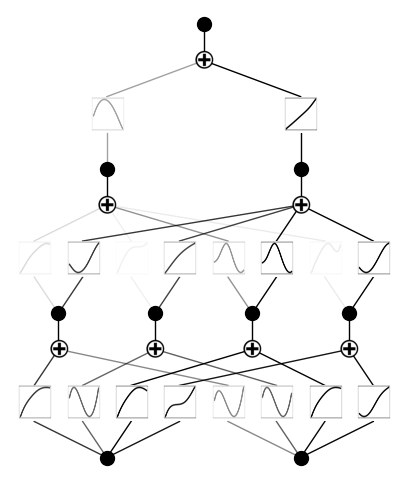

In [55]:
model.plot()

saving model version 0.2


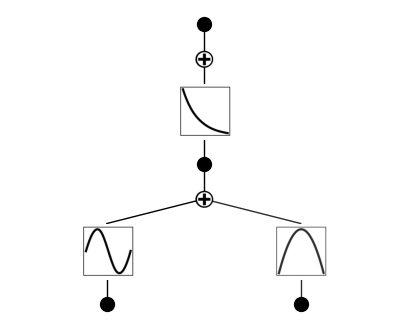

In [18]:
model = model.prune()
model.plot()